<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/UpdatedFinalSubmissionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns # for the correlation matrix plot
import pydot
import pydotplus
import io
import cv2
from google.colab import files

uploaded = files.upload()
wdbcwh = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh.csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We randomize the data to produce a more accurate model and to show us the variation in performance of our models as the data is different everytime. We could also use a random seed to produce the same "random" set of rows everytime, although we wanted to avoid this to reduce our models bias towards the data when training and testing our models.

In [2]:
# split data into training and test datasets
features = list(wdbcwh.columns[2:32])

X = wdbcwh[features]
y = wdbcwh['Diagnosis']
# could use random state 42 for same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Here we are showing some of the values in our training sets and our test sets, by doing this we can see that we have a decent amount of randomness in our data

In [3]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train       Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
155       12.250         17.94  ...          0.3113                  0.08132
40        13.440         21.58  ...          0.2994                  0.07146
216       11.890         18.35  ...          0.3397                  0.08365
341        9.606         16.84  ...          0.2982                  0.09825
69        12.780         16.49  ...          0.2383                  0.06410
..           ...           ...  ...             ...                      ...
474       10.880         15.62  ...          0.2581                  0.10800
227       15.000         15.51  ...          0.2954                  0.08362
46         8.196         16.84  ...          0.3105                  0.07409
483       13.700         17.64  ...          0.2518                  0.06960
205       15.120         16.68  ...          0.3415                  0.09740

[398 rows x 30 columns]
y_train  155    B
40     M
216    B
341   

We show the shape of our test and training sets here, when using different split values we will get differing results.  It is important to know the shape of our sets as we can reshape them if needed to fit our models

In [4]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (171, 30)
y_test set shape:  (171,)
X_train shape:  (398, 30)
y_train shape:  (398,)


Here we are replacing diagnosis values with a 1 for malignant and a 0 for benign, we do this because it makes it easier to perform numerical calculations on the sets. 

In [5]:
# Disabled pandas warning due to false positive
pd.options.mode.chained_assignment = None  # default='warn'


# Replace malignant with 1 and benign with 0
y_train = y_train.replace({'M':1,'B':0})
y_test = y_test.replace({'M':1,'B':0})
y = y.replace({'M':1,'B':0})
# resetting pandas warning
pd.options.mode.chained_assignment = 'warn'  # default='warn'
X_trainNB, y_trainNB = X_train, y_train


## Show standard deviation and variance between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.  We can also see from these variables the amount of variation in certain features or throughout the overall dataset, these are useful metrics when training the models as we can ensure the models are trained with a large variety of different values.

Standard deviation is calculated by calculating the sum of each element in our data set then subtracting the population mean from the element and squaring we then divide by n and get the square root

Variance is calculated by essentially the same way but without getting the square root of our end result

In [6]:
print('Standard deviation of values in x training set ',X_train.std())
print('Variance of diagnosis values in x training set: ', X_train.var())

Standard deviation of values in x training set  Mean_Radius                  3.474439
Mean_Texture                 4.191422
Mean_Perimeter              23.883118
Mean_Area                  340.434198
Mean_Smoothness              0.014355
Mean_Compactness             0.051363
Mean_Concavity               0.075707
Mean_Concave_Points          0.038313
Mean_Symmetry                0.028062
Mean_Fractal_Dimension       0.007099
Radius_SE                    0.240682
Texture_SE                   0.549591
Perimeter_SE                 1.665136
Area_SE                     34.638277
Smoothness_SE                0.003059
Compactness_SE               0.017753
Concavity_SE                 0.029912
Concave_Points_SE            0.006153
Symmetry_SE                  0.008259
Fractal_Dimension_SE         0.002831
Worst_Radius                 4.762298
Worst_Texture                5.959291
Worst_Perimeter             32.822293
Worst_Area                 550.490238
Worst_Smoothness             0.023383
Wo

In [7]:

print('Standard deviation of values in y training set ',y_train.std())
print('Variance of values in y training set: ', y_train.var())

Standard deviation of values in y training set  0.4870706585410927
Variance of values in y training set:  0.23723782641165372


In [8]:
print('Standard deviation of values in x testing set ',X_test.std())
print('Variance of values in x testing set: ', X_test.var())


Standard deviation of values in x testing set  Mean_Radius                  3.645248
Mean_Texture                 4.556451
Mean_Perimeter              25.305301
Mean_Area                  378.262439
Mean_Smoothness              0.013287
Mean_Compactness             0.055937
Mean_Concavity               0.088437
Mean_Concave_Points          0.040031
Mean_Symmetry                0.025925
Mean_Fractal_Dimension       0.006947
Radius_SE                    0.348665
Texture_SE                   0.558022
Perimeter_SE                 2.678011
Area_SE                     64.049666
Smoothness_SE                0.002875
Compactness_SE               0.018314
Concavity_SE                 0.030903
Concave_Points_SE            0.006227
Symmetry_SE                  0.008305
Fractal_Dimension_SE         0.002162
Worst_Radius                 5.007212
Worst_Texture                6.579048
Worst_Perimeter             35.448331
Worst_Area                 612.685218
Worst_Smoothness             0.021440
Wor

In [9]:
print('Standard deviation of values in y testing set ',y_test.std())
print('Variance of values in y testing set: ', y_test.var())

Standard deviation of values in y testing set  0.4767739312220711
Variance of values in y testing set:  0.22731338149294822


Lets look at a histogram of diagnosis values in both our training and test sets to get a visualized view of our sets

(array([[28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  1.,  1., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        ...,
        [30.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  1.,  1., ...,  0.,  0.,  0.],
        [28.,  0.,  1., ...,  0.,  0.,  0.]]),
 array([   0. ,  323.4,  646.8,  970.2, 1293.6, 1617. , 1940.4, 2263.8,
        2587.2, 2910.6, 3234. ]),
 <a list of 398 Lists of Patches objects>)

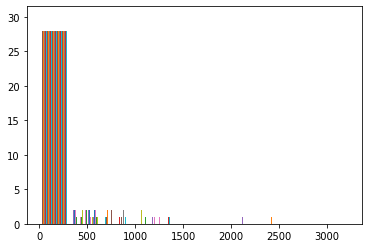

In [10]:
plt.hist(X_train)


(array([[28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        ...,
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  1.,  1., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.]]),
 array([   0. ,  425.4,  850.8, 1276.2, 1701.6, 2127. , 2552.4, 2977.8,
        3403.2, 3828.6, 4254. ]),
 <a list of 171 Lists of Patches objects>)

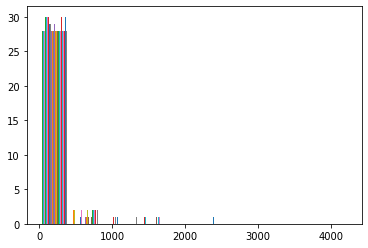

In [11]:
plt.hist(X_test)


(array([245.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 153.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

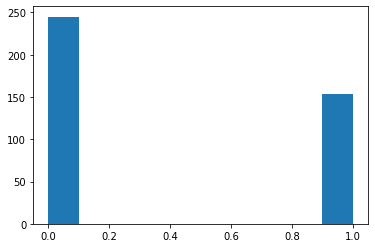

In [12]:
plt.hist(y_train)


(array([112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  59.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

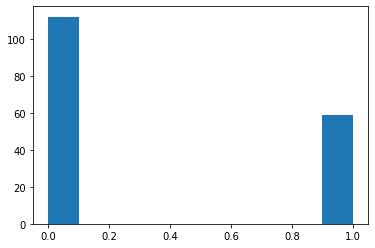

In [13]:
plt.hist(y_test)


## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets.

### Training Set Correlation values

In [14]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.315047,0.997901,0.989595,0.171704,0.498014,0.665922,0.824848,0.151274,-0.343621,0.662943,-0.119105,0.669229,0.793240,-0.206904,0.175122,0.164018,0.358106,-0.115409,-0.081335,0.970454,0.305370,0.965884,0.945685,0.131567,0.408107,0.535103,0.752264,0.196067,-0.020738
Mean_Texture,0.315047,1.000000,0.323624,0.314756,0.032210,0.268952,0.331219,0.321226,0.101872,-0.036896,0.267489,0.327468,0.289437,0.276194,0.030916,0.193932,0.143911,0.165159,0.028870,0.037152,0.338965,0.905702,0.349805,0.325320,0.120095,0.300668,0.333705,0.323598,0.141762,0.137538
Mean_Perimeter,0.997901,0.323624,1.000000,0.988606,0.208028,0.549014,0.705576,0.853058,0.185706,-0.294250,0.674306,-0.109765,0.687917,0.801166,-0.187934,0.219737,0.197273,0.387114,-0.092657,-0.046305,0.970585,0.313790,0.971094,0.946005,0.161886,0.451453,0.572801,0.779451,0.222200,0.024585
Mean_Area,0.989595,0.314756,0.988606,1.000000,0.179535,0.496180,0.678078,0.831758,0.160493,-0.311150,0.693790,-0.088827,0.697436,0.828313,-0.162415,0.182132,0.175796,0.350258,-0.090158,-0.057046,0.968123,0.302502,0.963645,0.964313,0.140981,0.392386,0.527981,0.737872,0.188072,-0.013429
Mean_Smoothness,0.171704,0.032210,0.208028,0.179535,1.000000,0.661819,0.515454,0.552768,0.564124,0.571781,0.331799,0.097563,0.335172,0.290419,0.323638,0.291932,0.204401,0.359060,0.179726,0.245796,0.221351,0.090554,0.246017,0.218347,0.805419,0.476022,0.418569,0.502767,0.404673,0.498411
Mean_Compactness,0.498014,0.268952,0.549014,0.496180,0.661819,1.000000,0.876729,0.821263,0.599867,0.547452,0.511446,0.019526,0.585929,0.515460,0.135971,0.716389,0.539975,0.617264,0.224435,0.461547,0.530368,0.274855,0.585349,0.509240,0.564478,0.868885,0.811832,0.812001,0.526357,0.684692
Mean_Concavity,0.665922,0.331219,0.705576,0.678078,0.515454,0.876729,1.000000,0.915892,0.502228,0.322689,0.621143,0.076789,0.670000,0.657696,0.117751,0.653842,0.670584,0.666265,0.170112,0.436578,0.679868,0.333361,0.720863,0.670766,0.448242,0.751059,0.880840,0.855231,0.427499,0.515407
Mean_Concave_Points,0.824848,0.321226,0.853058,0.831758,0.552768,0.821263,0.915892,1.000000,0.464258,0.131228,0.712173,0.013590,0.741749,0.772866,0.036272,0.458737,0.401077,0.587013,0.092295,0.212779,0.835891,0.324570,0.859908,0.822510,0.455604,0.661806,0.750203,0.909080,0.404034,0.346719
Mean_Symmetry,0.151274,0.101872,0.185706,0.160493,0.564124,0.599867,0.502228,0.464258,1.000000,0.466427,0.358773,0.133584,0.366263,0.296709,0.196374,0.400347,0.323767,0.376487,0.446976,0.318042,0.192955,0.117100,0.221356,0.189210,0.432645,0.469259,0.424613,0.424167,0.696417,0.448632
Mean_Fractal_Dimension,-0.343621,-0.036896,-0.294250,-0.311150,0.571781,0.547452,0.322689,0.131228,0.466427,1.000000,-0.001565,0.174524,0.045969,-0.108162,0.389243,0.549316,0.438070,0.311422,0.333118,0.668896,-0.281678,-0.025108,-0.234003,-0.255698,0.489871,0.446996,0.321090,0.141829,0.320696,0.781009


### Test set correlation values

In [15]:
X_test.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.341093,0.997841,0.984042,0.174791,0.528881,0.703651,0.818615,0.140235,-0.237675,0.726966,-0.049466,0.719214,0.734979,-0.260405,0.273443,0.259398,0.415912,-0.080893,0.068209,0.967616,0.280667,0.964041,0.933217,0.095688,0.428942,0.517910,0.727770,0.089845,0.065027
Mean_Texture,0.341093,1.000000,0.341108,0.332998,-0.148657,0.177343,0.252547,0.237162,0.001311,-0.160536,0.296238,0.511939,0.285356,0.262743,-0.048440,0.188812,0.142238,0.161085,-0.033906,0.105422,0.380017,0.924998,0.374214,0.378683,-0.017676,0.236632,0.245652,0.236257,0.023190,0.089483
Mean_Perimeter,0.997841,0.341108,1.000000,0.983084,0.211672,0.578165,0.741238,0.847293,0.177951,-0.187239,0.739951,-0.036779,0.737117,0.743782,-0.238078,0.317613,0.293946,0.451158,-0.058252,0.111745,0.967155,0.281895,0.969100,0.933561,0.127754,0.468176,0.552714,0.754517,0.113712,0.105033
Mean_Area,0.984042,0.332998,0.983084,1.000000,0.177321,0.507258,0.703275,0.807732,0.132224,-0.224004,0.805090,-0.019701,0.794597,0.825840,-0.177929,0.275451,0.272909,0.419108,-0.036403,0.081175,0.952970,0.259019,0.950574,0.949623,0.087774,0.389509,0.488617,0.691689,0.047102,0.037430
Mean_Smoothness,0.174791,-0.148657,0.211672,0.177321,1.000000,0.654756,0.542828,0.561490,0.545122,0.612930,0.266337,-0.003983,0.259431,0.216446,0.356969,0.386456,0.358801,0.440416,0.259616,0.416555,0.199674,-0.088158,0.227808,0.185633,0.802576,0.463628,0.474818,0.507633,0.371433,0.501410
Mean_Compactness,0.528881,0.177343,0.578165,0.507258,0.654756,1.000000,0.896069,0.854577,0.617746,0.602204,0.488349,0.102334,0.522176,0.418342,0.134164,0.787727,0.637108,0.700737,0.246250,0.663356,0.550728,0.197108,0.603987,0.513631,0.569369,0.858847,0.825583,0.827590,0.480151,0.689671
Mean_Concavity,0.703651,0.252547,0.741238,0.703275,0.542828,0.896069,1.000000,0.936692,0.507661,0.365002,0.654884,0.075421,0.666416,0.606735,0.058728,0.705813,0.736021,0.723597,0.197151,0.513724,0.709640,0.239939,0.749366,0.687696,0.455826,0.762048,0.889250,0.880496,0.378430,0.511562
Mean_Concave_Points,0.818615,0.237162,0.847293,0.807732,0.561490,0.854577,0.936692,1.000000,0.460741,0.248111,0.698925,0.038779,0.706252,0.652976,0.007078,0.558969,0.521618,0.679331,0.102640,0.398310,0.819166,0.228621,0.848344,0.785084,0.449453,0.680650,0.761543,0.912896,0.310942,0.413518
Mean_Symmetry,0.140235,0.001311,0.177951,0.132224,0.545122,0.617746,0.507661,0.460741,1.000000,0.518208,0.226439,0.114682,0.261550,0.156318,0.162987,0.475749,0.390293,0.436510,0.455975,0.381921,0.169564,0.031087,0.215973,0.152065,0.412463,0.488666,0.463485,0.446865,0.709199,0.426092
Mean_Fractal_Dimension,-0.237675,-0.160536,-0.187239,-0.224004,0.612930,0.602204,0.365002,0.248111,0.518208,1.000000,-0.000279,0.140315,0.029431,-0.083376,0.435550,0.586018,0.469401,0.414936,0.378684,0.770315,-0.189455,-0.108699,-0.141806,-0.182349,0.539040,0.481765,0.396710,0.254222,0.369913,0.742352


## Heatmap of correlation in our dataset
As you can see from the legend the lighter the square the more highly correlated the feature data and the darker the square the less correlated or negative correlation as they become darker still. 

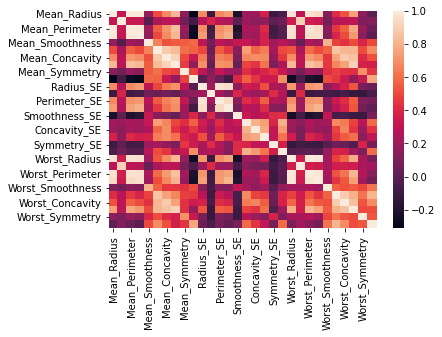

In [16]:
# it computes the Pearson’s correlation coefficient.
corr_matrix = X.corr()
#The parameter ‘ annot=True ‘ displays the values of the correlation coefficient
#in each cell
sns.heatmap(corr_matrix, annot = False)
plt.show()


# Training the linear regression model

Here we are using linear regression to compare features in our model to see the correlation between them.  We are training this model to show us how dependent the variables are on one another.

### Reference
SKLearn documentation on Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Creating linear regression model for Mean_Radius and Mean_Fractal_Dimension
Here I have trained a model to show us the negative correlation between two features in our dataset, we can clearly see from this model that the Mean_Radius has a negative impact on the Mean_Fractal_Dimension.  When the Mean_Fractal_Dimension value increases then on average the Mean_Radius value decreases and vice versa.

y test r^2 value:  1.0
mean_squared_error value:  0.0001287862435551815
Coefficient:  [[-0.00070213]]
Intercept:  [0.07247118]
predict  [[-0.03523536]]


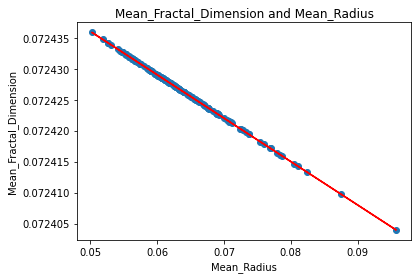

In [17]:
# Here we train a model to perform linear regression data set to predict the diagnosis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy import stats
# create the linear regression model by fitting training set to the test set
fractalDimensionArrayTest = np.array(X_test['Mean_Fractal_Dimension']).reshape(-1,1)
fractalDimensionArrayTrain = np.array(X_train['Mean_Fractal_Dimension']).reshape(-1,1)
meanRadiusArrayTrain = np.array(X_train['Mean_Radius']).reshape(-1,1)
regression_model = LinearRegression().fit(meanRadiusArrayTrain, fractalDimensionArrayTrain)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(fractalDimensionArrayTest)
rSquared = regression_model.score(fractalDimensionArrayTest, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(fractalDimensionArrayTest, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Mean_Radius")
plt.ylabel("Mean_Fractal_Dimension")
plt.title('Mean_Fractal_Dimension and Mean_Radius')
plt.scatter(fractalDimensionArrayTest,y_pred)
plt.plot(fractalDimensionArrayTest,y_pred,c='r')
print('predict ',regression_model.predict([[153.4]]))


I will demonstrate with some predictions below that the values are negatively skewed.  We will see that whenever we pass in a high fractal dimension the value will be lower and vice versa.  We can also see there is a low mean square error and a negative coefficient.  Since our coefficient is negative we will see that negative values will produce higher values for our dependent variable where as higher values will produce low values for our dependent variable

In [18]:
# As we can see not too much of a difference between the values here
print('this value will be low: ', regression_model.predict([[0.5]]))
print('this value will be high: ', regression_model.predict([[0.1]]))

# just to make our example clearer let's use ridiculously inflated values  
print('let\'s make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another')
print('this value will be low: ', regression_model.predict([[100]]))
# I use a negative value here to demonstrate the radius the higher the mean fractal dimension
print('this value will be high: ', regression_model.predict([[-100]]))


this value will be low:  [[0.07212012]]
this value will be high:  [[0.07240097]]
let's make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another
this value will be low:  [[0.00225832]]
this value will be high:  [[0.14268405]]


As we can see above that whenever I make the value of the mean fractal dimension higher then the value of our dependent variable will decrease, whenever I make it lower it will increase.  We can also see that the values don't have too much of an effect on each other this is because the low value of the negative correlation

# Positive correlation
Here we compare the concave points severity with the concavity severity, we see that there is a positive linear correlation between the two variables, we also see that the R^2 value is one which indicates a possible overfitting of our model.  We can see clearly from this graph that the two variables have a high correlation and that if the value increases in one of the variables then we can predict that the other variable also increases

y test r^2 value:  1.0
mean_squared_error value:  3.708490925650342e-05
Coefficient:  [[0.16074062]]
Intercept:  [0.0066976]


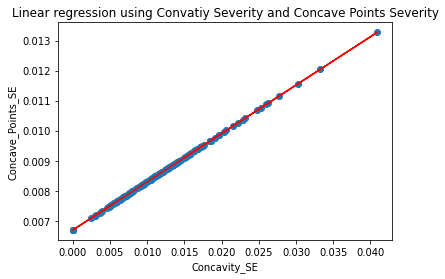

In [19]:
# create the linear regression model by fitting training set to the test set
concavePointsSeverityArrayTest = np.array(X_test['Concave_Points_SE']).reshape(-1,1)
concavePointsSeverityArrayTrain = np.array(X_train['Concave_Points_SE']).reshape(-1,1)
concaveSeverityTrain = np.array(X_train['Concavity_SE']).reshape(-1,1)
# here we need to reshape the data using numpy so that the training data matches the testdata
regression_model = LinearRegression().fit(concaveSeverityTrain, concavePointsSeverityArrayTrain)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(concavePointsSeverityArrayTest)
rSquared = regression_model.score(concavePointsSeverityArrayTest, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(concavePointsSeverityArrayTest, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)
plt.xlabel("Concavity_SE")
plt.ylabel("Concave_Points_SE")
plt.title('Linear regression using Convatiy Severity and Concave Points Severity')
plt.scatter(concavePointsSeverityArrayTest,y_pred)
plt.plot(concavePointsSeverityArrayTest,y_pred,c='r')

We can see here there is a positive coefficient which is the amount we expect the value to increase by when making a prediction, we can also see that there is a low mean squared error value this indicates the performance of the model and the distance away the points are from our line

Below we see the second models features have on one another, we can clearly see that the data has a positive correlation from our graph but let's show some concrete examples and perform some predictions using it.

In [20]:
print('this value will be high: ', regression_model.predict([[0.5]]))
print('this value will be low: ', regression_model.predict([[0.1]]))

# just to show how high the impact will be with grossly inflated / deflated values values

print('let\'s make our model predict some grossly inflated / deflated values to show severity of impact')
print('this value will be high: ', regression_model.predict([[100]]))
print('this value will be low: ', regression_model.predict([[0.0000000001]]))


this value will be high:  [[0.08706791]]
this value will be low:  [[0.02277166]]
let's make our model predict some grossly inflated / deflated values to show severity of impact
this value will be high:  [[16.08075974]]
this value will be low:  [[0.0066976]]


Since the above values are highly correlated we see a greater rise and decrease in the predicted values when predicting than we did in the first linear regression model.  This is due to the fact that these two variables have a positive correlation of 0.776207, the features we used in our first model have a lower negative correlation which is why we don't see as much of an impact on them.  If they had a negative correlation of 0.776207 we would see the same rise and decrease in the first linear regression models predicted valules as well

# Examples of low and high correlation in our dataset

Additionally we can see here the Mean Perimeter has a positive correlation with our Mean Radius feature.  Below this image we can see an example of low negative correlation, these variables don't really impact each other much

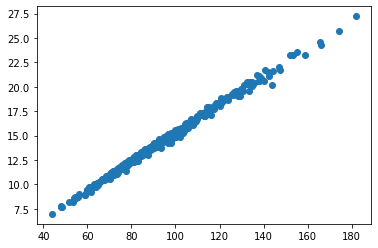

In [21]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(X_train['Mean_Perimeter'],X_train['Mean_Radius'])


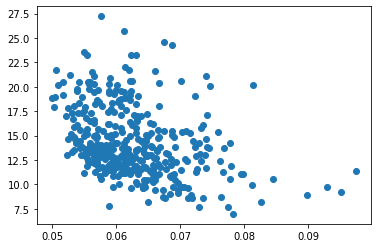

In [22]:
# example of low negative correlation
plt.scatter(X_train['Mean_Fractal_Dimension'],X_train['Mean_Radius'])


In [23]:
def predictValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)

In [24]:
def predictKnnValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)

# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.96 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data. This algorithm works by clustering data with similar features and classifying them.

### references

SKLearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [25]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=55)
knn.fit(X_train,y_train)
print('Performance of model: ',knn.score(X,y))


Performance of model:  0.9156414762741653


In [26]:
# Make prediction on testSet
predictValues(y,knn.predict(X))

Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on features from the dataset, I chose to input a large number of features into this model as generally this algorithm performs better when fitted with more features, in Naive Bayes the weights of the features have no bearing on the output.  The model below appears to be overfitted

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

You may also notice we are using a particular kind of Naive Bayes called Gaussian Naive Bayes for this model.  We chose to include this version of Naive Bayes due to it's ability to handle continuous data. The algorithm also has the advantage of speed and is frequently used in email spam classifiers.  The algorithm works by assuming that the continuous values across the features are normally distributed in a Gaussian fashion(think of a bell curve!)

In [27]:

from sklearn.naive_bayes import GaussianNB
yTestArray = np.array(y_test).reshape(-1,1)
y_trainArray = np.array(y_train).reshape(-1,1)
probability = np.array(y_test.iloc[0:2]).reshape(-1,1)

# here we smooth the data to improve accuracy
naive_bayes = GaussianNB(priors=None)
y_train_pred = naive_bayes.fit(X_train,y_train).predict(y_trainArray)
print('Score of model on training set: ', naive_bayes.score(X_train,y_train))
y_pred = naive_bayes.fit(X_train,y_train).predict(yTestArray)
print('Score of model on test sets: ', naive_bayes.score(X_test,y_test))
print('Probability of diagnosis values occurring: ',naive_bayes.predict_proba(probability))


Score of model on training set:  0.9346733668341709
Score of model on test sets:  0.9649122807017544
Probability of diagnosis values occurring:  [[0.00917506 0.99082494]
 [0.00917506 0.99082494]]


In [28]:
predictValues(yTestArray,y_pred)
predictValues(y_trainArray,y_train_pred)


Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predic

# Alternative Naive Bayes Model

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler  
# scaling the features to reduce unwanted influence 
sc = StandardScaler()  
X_train_scaled = sc.fit_transform(X_train)  
X_test_scaled = sc.fit_transform(X_test) 

# reshaping y_test to fit with naive_bayes predict output for comparison
yTestReshaped = np.array(y_test).reshape(-1,1)

naive_bayes = GaussianNB(priors=None)
#training the model 
naive_bayes.fit(X_train_scaled,y_train)
#using X_test data in the trained model to predict y
y_pred=naive_bayes.predict(X_test_scaled)

print('Score of model on test sets: ', naive_bayes.score(X_test_scaled,y_test))
print('Accuracy Score of results: ',accuracy_score(y_test, y_pred)) #using as a double check on accuracy
# printing the probability
print('Probability of diagnosis values occurring: ',naive_bayes.predict_proba(X_test_scaled))
# The actual and predicted side by side and totaled comparison
print(predictValues(yTestReshaped,y_pred))

Score of model on test sets:  0.9766081871345029
Accuracy Score of results:  0.9766081871345029
Probability of diagnosis values occurring:  [[9.99915355e-001 8.46446489e-005]
 [9.99999177e-001 8.22781786e-007]
 [1.00000000e+000 8.71342492e-017]
 [6.03838860e-064 1.00000000e+000]
 [2.03543068e-055 1.00000000e+000]
 [1.00000000e+000 1.14315081e-015]
 [6.57753000e-002 9.34224700e-001]
 [4.98508714e-051 1.00000000e+000]
 [1.00000000e+000 2.77223910e-013]
 [9.99999692e-001 3.07895056e-007]
 [1.00000000e+000 4.24304421e-013]
 [1.00000000e+000 3.34478460e-014]
 [2.25809004e-021 1.00000000e+000]
 [1.00000000e+000 1.03386644e-013]
 [5.95487611e-020 1.00000000e+000]
 [1.00000000e+000 3.33869267e-016]
 [3.68852936e-042 1.00000000e+000]
 [1.00000000e+000 9.66847885e-014]
 [1.00000000e+000 1.07376374e-016]
 [1.69513174e-068 1.00000000e+000]
 [1.00000000e+000 3.38364550e-015]
 [1.00000000e+000 6.01034237e-015]
 [1.00000000e+000 7.10106889e-012]
 [9.99999934e-001 6.55843769e-008]
 [1.00000000e+000 3.

In [30]:
#Confusion Matrix for alternative Naive Bayes  

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(yTestReshaped, y_pred)  

print(cm)  

[[110   2]
 [  2  57]]


## Second Naive Bayes Model

Demonstrating the zero frequency phenomenon, we can see below that when we train the model using our NB train sets we experience a phenomenon known as zero frequency.  This occurs when the model takes all probabilities of our features and performs calculations which result in a total score of zero.  Here we induced zero frequency by removing the smoothing of the data

In [31]:
naive_bayes = GaussianNB(priors=None,var_smoothing=1)


y_train_pred = naive_bayes.fit(X_train,y_train).predict(y_trainArray)
y_pred = naive_bayes.fit(X_train,y_train).predict(yTestArray)
print('Score of model: ', naive_bayes.score(X_test,y_test))
print('Probability of diagnosis values occurring: ',naive_bayes.predict_proba(probability))




Score of model:  0.847953216374269
Probability of diagnosis values occurring:  [[0.94437537 0.05562463]
 [0.94437537 0.05562463]]


In [32]:
predictValues(y_trainArray,y_train_pred)
predictValues(yTestArray,y_pred) 

Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predic

# Decision Trees

In [33]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


Training the first default tree model

In [34]:
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)



In [35]:
print(y_test.shape,y_train.shape,X_train.shape,X_test.shape)

(171,) (398,) (398, 30) (171, 30)


Here we display the tree

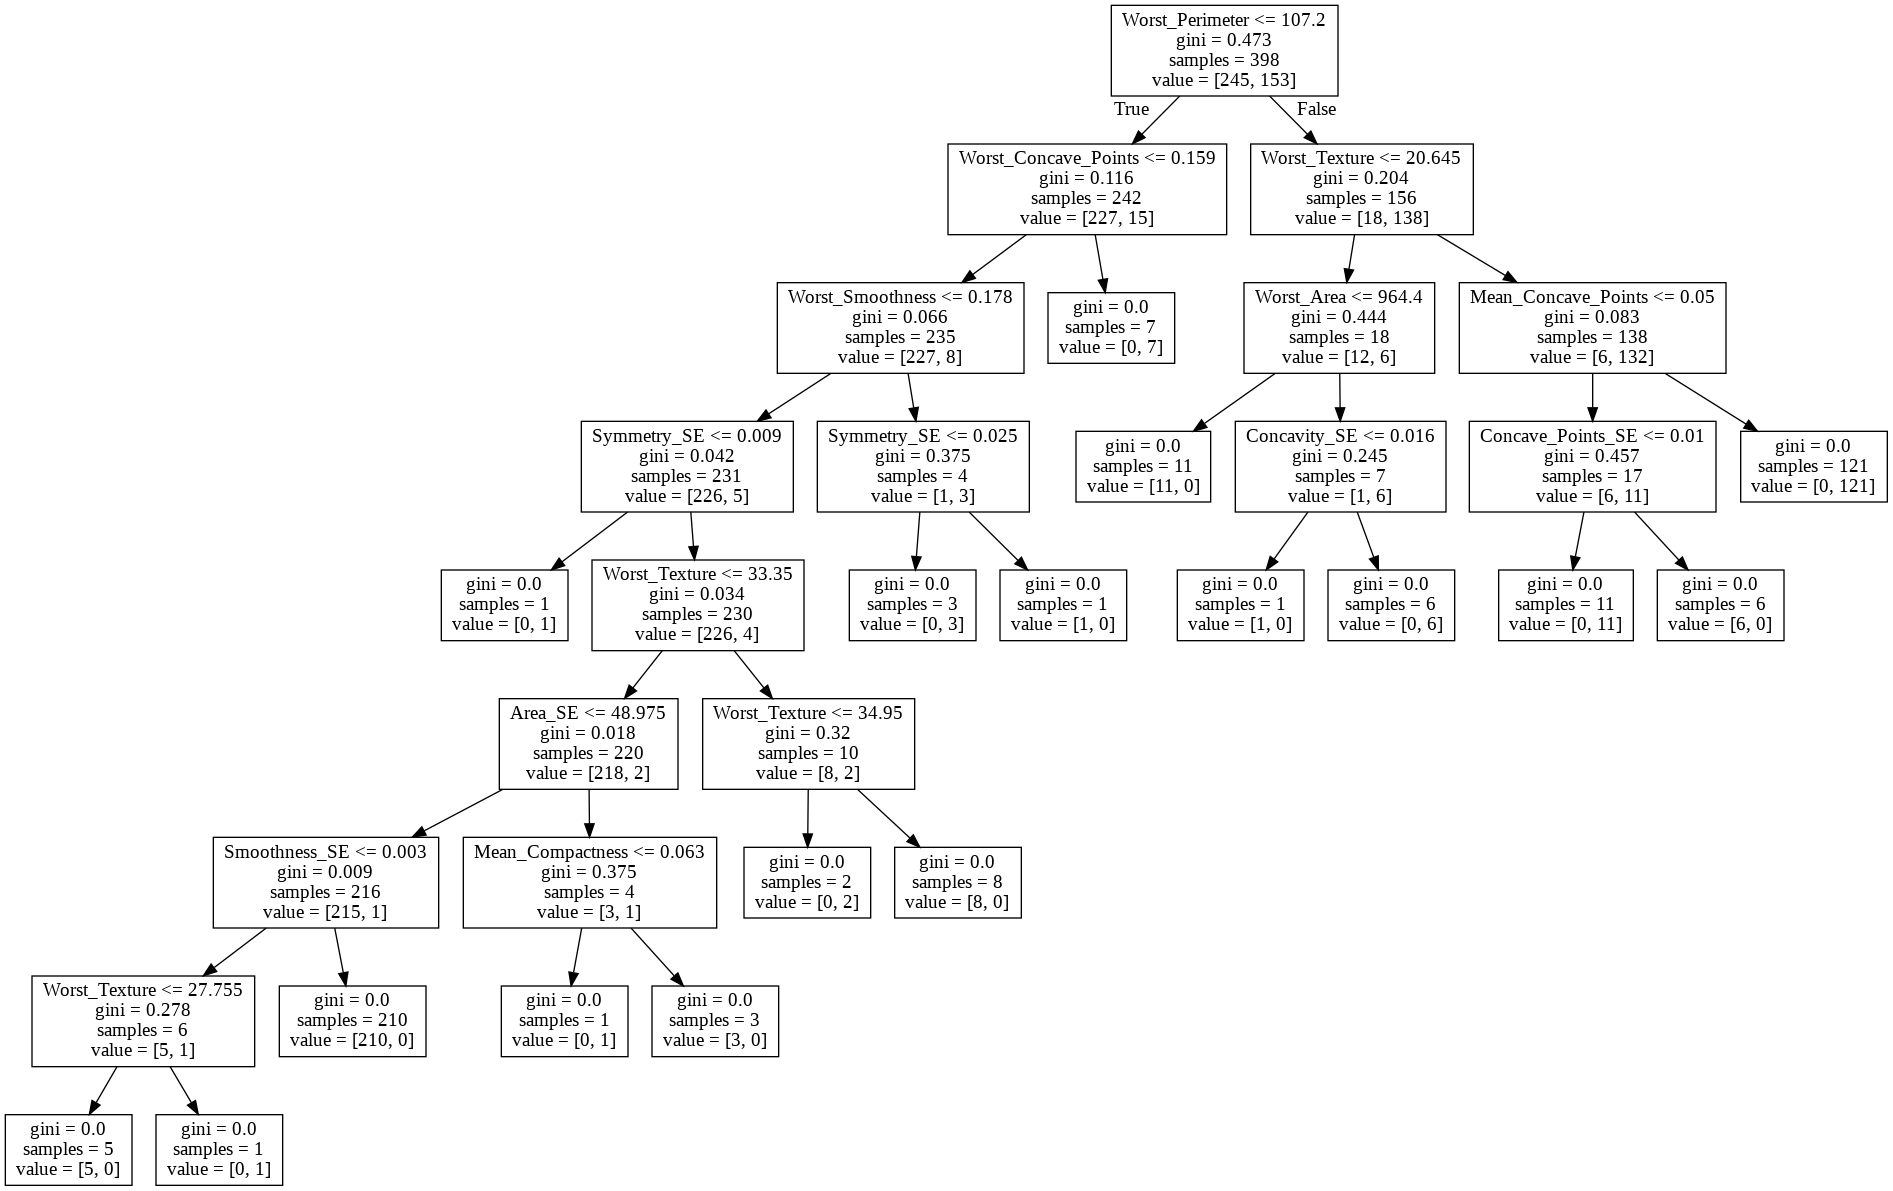

In [36]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The predicticton result for test data, this should really be fresh data not reusing training data



In [37]:
#When we use our training data above we should use our validation data here to test the predictions and have a further test set 
# however we only have train and test data so using Test set
print("Making predictions for the following test patients:")
print(X_test)
print("The predictions are")
print(clf.predict(X_test))

Making predictions for the following test patients:
     Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
148        14.44         15.18  ...          0.2691                  0.07683
560        14.05         27.15  ...          0.2250                  0.08321
294        12.72         13.78  ...          0.2369                  0.06922
252        19.73         19.82  ...          0.2749                  0.12970
30         18.63         25.11  ...          0.3444                  0.09782
..           ...           ...  ...             ...                      ...
373        20.64         17.35  ...          0.2689                  0.07055
229        12.83         22.33  ...          0.3407                  0.12430
502        12.54         16.32  ...          0.3155                  0.07538
172        15.46         11.89  ...          0.3216                  0.10100
107        12.36         18.54  ...          0.2983                  0.07185

[171 rows x 30 columns]

Desicion tree test results



In [38]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0
 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0]
Accuracy: 0.9473684210526315


Random forest

In [39]:

from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=10)
rfclf = rfclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfclf.predict(X_test)
print(y_pred)

#Test Random forest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0]
Accuracy: 0.9766081871345029


So we can see that the Random forest is more accurate

We also explored the alternative to the decision tree using entropy criterion rather than the default gini



In [40]:

entclf = tree.DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
entclf = entclf.fit(X_train,y_train)

Display the entropy tree



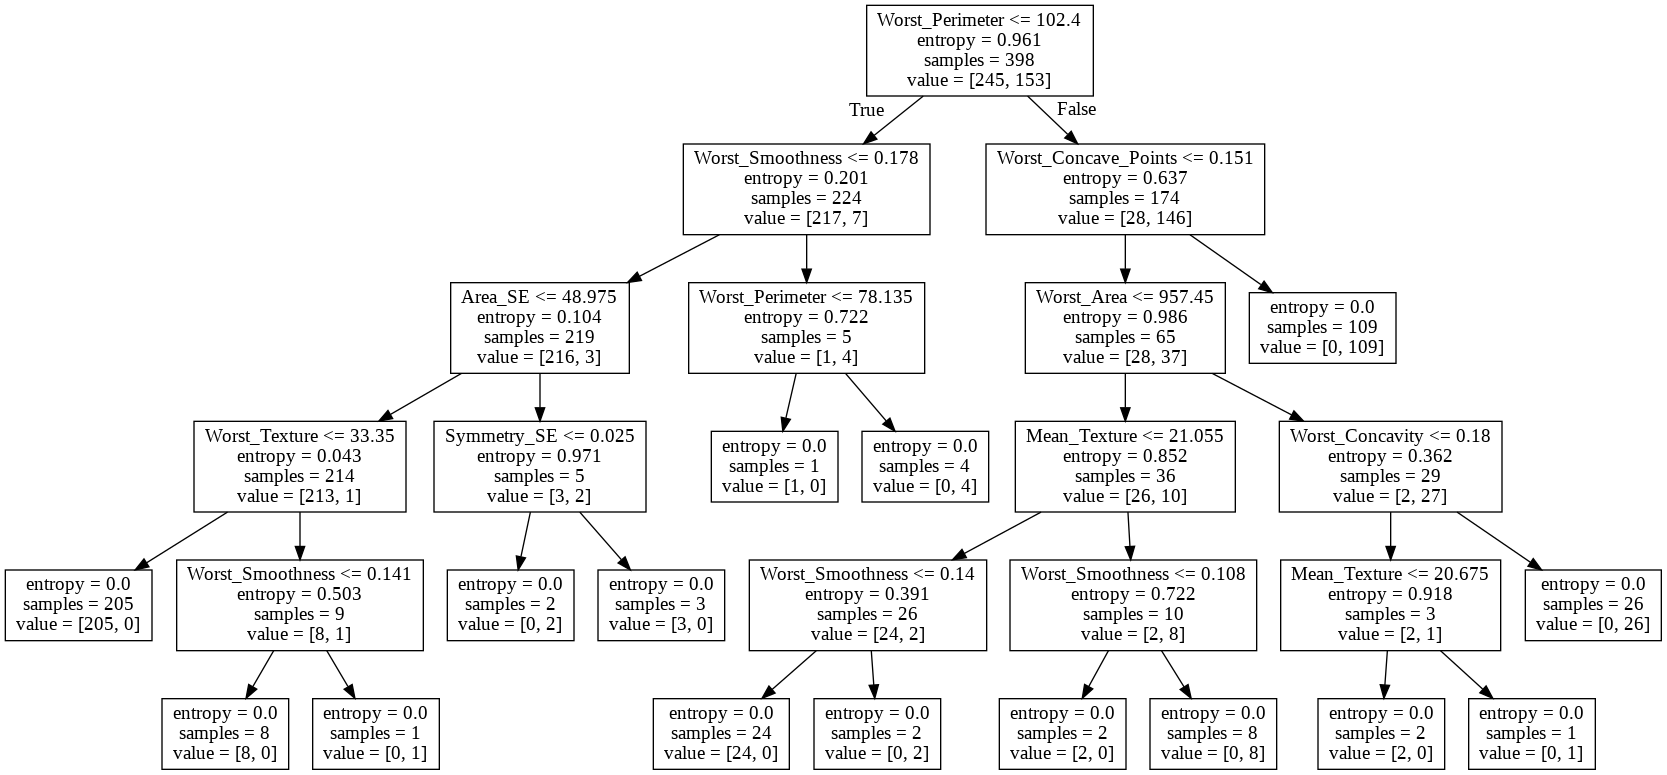

In [41]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(entclf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

entropy tree results

In [42]:

#Predict the response for test dataset
y_pred = entclf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0]
Accuracy: 0.935672514619883


Random Entropy forest

In [43]:

rfentclf = RandomForestClassifier(criterion="entropy",n_estimators=10)
rfentclf = rfentclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfentclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0]
Accuracy: 0.9649122807017544


 the tree and forest models explored via Cross-validation



In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
np.random.seed(1)
print('X_test set shape: ',X.shape)
print('y_test set shape: ',y.shape)
# trees and forests used above but without the train/test split these will be applied using the cross validation to see the accuracy of the models 
cvclf = tree.DecisionTreeClassifier()
cvrfclf = RandomForestClassifier(n_estimators=10)
cventclf = tree.DecisionTreeClassifier(criterion="entropy")
cvrfentclf = RandomForestClassifier(criterion="entropy",n_estimators=10)

scores = cross_val_score(cvclf, X, y)
print('gini tree accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
cvResults=cross_validate(cvclf, X, y)
print('Test scores for gini tree:',cvResults['test_score'])

scores = cross_val_score(cvrfclf, X, y)
print('gini random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
cvResults=cross_validate(cvrfclf, X, y)
print('Test scores for gini random forest:',cvResults['test_score'])

scores = cross_val_score(cventclf, X, y)
print('entropy accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
cvResults=cross_validate(cventclf, X, y)
print('Test scores for entropy tree:',cvResults['test_score'])

scores = cross_val_score(cvrfentclf, X, y)
print('entropy random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
cvResults=cross_validate(cvrfentclf, X, y)
print('Test scores for entropy forest:',cvResults['test_score'])


X_test set shape:  (569, 30)
y_test set shape:  (569,)
gini tree accuracy = 0.9121099208197485 +/- 0.011235106844788624
Test scores for gini tree: [0.9122807  0.9122807  0.92105263 0.92105263 0.90265487]
gini random forest accuracy = 0.9613724576929048 +/- 0.013078882567012277
Test scores for gini random forest: [0.97368421 0.92105263 0.97368421 0.95614035 0.97345133]
entropy accuracy = 0.924437199192672 +/- 0.015253603562759774
Test scores for entropy tree: [0.92982456 0.90350877 0.94736842 0.95614035 0.94690265]
entropy random forest accuracy = 0.9525539512498058 +/- 0.020446752406022548
Test scores for entropy forest: [0.93859649 0.93859649 0.97368421 0.95614035 0.96460177]


Principal Component Analysis(PCA) exploring the difference of using reduced dimensions.  

In [78]:
# Standardise the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = wdbcwh[features]
x = StandardScaler().fit_transform(x)
#Explain the results
print(np.mean(x))
print(np.std(x))
#PCA we found that 7 components retained over 90% of the data
pca = PCA(n_components=7, whiten=True).fit(x)
X_pca = pca.transform(x)
print(pca.components_)
print("Information retained by each component:",pca.explained_variance_ratio_)
print("Retained information total:",sum(pca.explained_variance_ratio_))

1.2487570048507913e-18
1.0
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e

Applying the PCA to the gini decision tree and random forest

In [79]:
X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, y, test_size=0.3)

pcaclf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
pcaclf = pcaclf.fit(X_pcatrain,y_pcatrain)

#Predict the response for test dataset
y_pcapred = pcaclf.predict(X_pcatest)
print(y_pcapred)
# Test decision tree accuracy
print("PCA Gini Tree Accuracy:",metrics.accuracy_score(y_pcatest, y_pcapred))

pcarfclf = RandomForestClassifier(n_estimators=10)
pcarfclf = pcarfclf.fit(X_pcatrain,y_pcatrain)
#Predict result from the data given
y_pcarfpred=pcarfclf.predict(X_pcatest)
print(y_pcarfpred)

#Test Random forest accuracy
print("PCA Gini Random Forest Accuracy:",metrics.accuracy_score(y_pcatest, y_pcarfpred))

[0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
PCA Gini Tree Accuracy: 0.9415204678362573
[0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
PCA Gini Random Forest Accuracy: 0.9766081871345029


As we can see the results are still highly accurate and if the data set was larger this reduction in features/columns would become more obvious for speed. However that would have to be offset against the possibility of misdiagnosis